In [1]:
import sys
sys.path.append('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih')
from patient_data import DataMatrix
import numpy as np
import h5py

In [2]:
dm = DataMatrix.load_hdf5("/lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/cAItomorph_Fatih/Results_fold1_Transformer_lr0.0002_ep150_es50_wd0.01_CosineAnnealingLR/patient_data.h5")
patient_names = dm.get_patient_names()
patient_data = dm[patient_names[0]]
patient_data.describe()

📂 Loaded 2043 patients from '/lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/cAItomorph_Fatih/Results_fold1_Transformer_lr0.0002_ep150_es50_wd0.01_CosineAnnealingLR/patient_data.h5'.

PatientRecord schema
-----------------------------------------------------------------------------
true_label     : Ground-truth class index
pred_label     : Predicted class index
latent         : Bag-level representation (embedding_dim,)
attention      : Per-instance attention scores
image_paths    : Full paths of the images in this bag
prediction_vector : Raw logits for every class
loss           : Cross-entropy loss for this patient
-----------------------------------------------------------------------------


In [3]:
patient_data.true_label

0

In [4]:
patient_data.latent.shape, patient_data.attention.shape, patient_data.prediction_vector.shape

((1, 512), (496,), (1, 8))

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
import ast
from pathlib import Path

In [3]:
results_root_path = Path('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results')
results_folders = list(results_root_path.glob('Results_5fold*'))

In [4]:

import re
def clean_and_parse(pred_str):
    # Remove 'np.float32' and parse the list
    cleaned = re.sub(r'np\.float32\((.*?)\)', r'\1', pred_str)
    return [float(v) for v in eval(cleaned)]


In [6]:
results_dict = {}

for result_folder in results_folders:
    # Check if all folds have the required metadata file before processing
    skip_folder = False
    for fold in range(5):
        metadata_file = result_folder / f'fold_{fold}' / 'metadata_results_test.csv'
        if not metadata_file.exists():
            print(f"Skipping {result_folder.name} - missing metadata file for fold_{fold}")
            skip_folder = False
            break
    
    if skip_folder:
        continue
        
    # If we get here, all files exist so process the folder
    b_accs = []
    f1_scores = []
    tmp = {}
    
    try:
        for fold in range(5):
            test_metadata = pd.read_csv(result_folder / f'fold_{fold}' / 'metadata_results_test.csv')
            test_metadata['prediction'] = test_metadata['prediction'].apply(clean_and_parse)
            test_metadata['predicted_label'] = test_metadata['prediction'].apply(lambda x: np.argmax(x))
            print(test_metadata[['label', 'predicted_label']]   )
            b_acc = balanced_accuracy_score(test_metadata['label'], test_metadata['predicted_label'])
            f1 = f1_score(test_metadata['label'], test_metadata['predicted_label'], average='weighted')
            b_accs.append(b_acc)
            f1_scores.append(f1)
        
        tmp['balanced_accuracy'] = (np.mean(b_accs), np.std(b_accs))
        tmp['f1_score'] = (np.mean(f1_scores), np.std(f1_scores))
        results_dict[result_folder.name] = tmp
        print(f"Successfully processed {result_folder.name}")
    
    except Exception as e:
        print(f"Error processing {result_folder.name}: {str(e)}")
        continue

     label  predicted_label
0        1                1
1        3                3
2        0                0
3        4                4
4        4                0
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                3
408      4                0

[409 rows x 2 columns]
     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                5
4        4                4
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                3
408      4                4

[409 rows x 2 columns]
     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                5
4        4                0
..     ...              ...
404      0                0
405      1                2
406      7                7


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               16
4        4                2
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                2

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               16
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
Successfully processed Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha1.01
     label  predicted_label
0        1                2
1        3               11
2        0                2
3      

/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4                3
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               16
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1                8
406      7               13
407      3               16
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
Successfully processed Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha0.51
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4                3
4        4                2
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3  

/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               16
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                2
..     ...              ...
404      0                2
405      1               11
406      7               13


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
Successfully processed Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.61
Skipping Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed

/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4                3
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


     label  predicted_label
0        1                1
1        3                3
2        0                0
3        4                5
4        4                0
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                3
408      4                4

[409 rows x 2 columns]
Successfully processed Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.31
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4                3
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3

/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                5
4        4                0
..     ...              ...
404      0                0
405      1                2
406      7                7
407      3                3
408      4                4

[409 rows x 2 columns]
     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                4
4        4                4
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                7
408      4                4

[409 rows x 2 columns]
     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                5
4        4                4
..     ...              ...
404      0                0
405      1                3
406      7                7


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                4
4        4                0
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                3
408      4                4

[409 rows x 2 columns]
     label  predicted_label
0        1                1
1        3                3
2        0                0
3        4                5
4        4                4
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                3
408      4                4

[409 rows x 2 columns]
     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                5
4        4                0
..     ...              ...
404      0                0
405      1                3
406      7                7


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               16
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
Successfully processed Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.91
Skipping Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.3 - missing metadata file for fold_0
Error processing Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.3: [Errno 2] No such file or directory: '/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Re

/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
Successfully processed Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha0.31
     label  predicted_label
0        1                2
1        3               11
2        0                2
3  

/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


     label  predicted_label
0        1                1
1        3                3
2        0                0
3        4                5
4        4                4
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                3
408      4                4

[409 rows x 2 columns]
     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                5
4        4                0
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                3
408      4                4

[409 rows x 2 columns]
     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                4
4        4                4
..     ...              ...
404      0                0
405      1                3
406      7                7


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               16
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                0
1        3                3
2        0                0
3        4                5
4        4                4
..     ...              ...
404      0                0
405      1                3
406      7                7
407      3                3
408      4                4

[409 rows x 2 columns]
Successfully processed Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.81
Skipping Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.5 - missing metadata file for fold_0
Error processing Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.5: [Errno 2] No such file or directory: '/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_resu

/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               16
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4                3
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
Successfully processed Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.11
Skipping Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed

/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/sit

     label  predicted_label
0        1                2
1        3               11
2        0                2
3        4               10
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               13
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4               16
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13
407      3               11
408      4                3

[409 rows x 2 columns]
     label  predicted_label
0        1                8
1        3               11
2        0                2
3        4                3
4        4                3
..     ...              ...
404      0                2
405      1               11
406      7               13


/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aih/fatih.oezluegedik/miniconda3/envs/dinoBloom2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


/tmp/ipykernel_2779902/2929829087.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


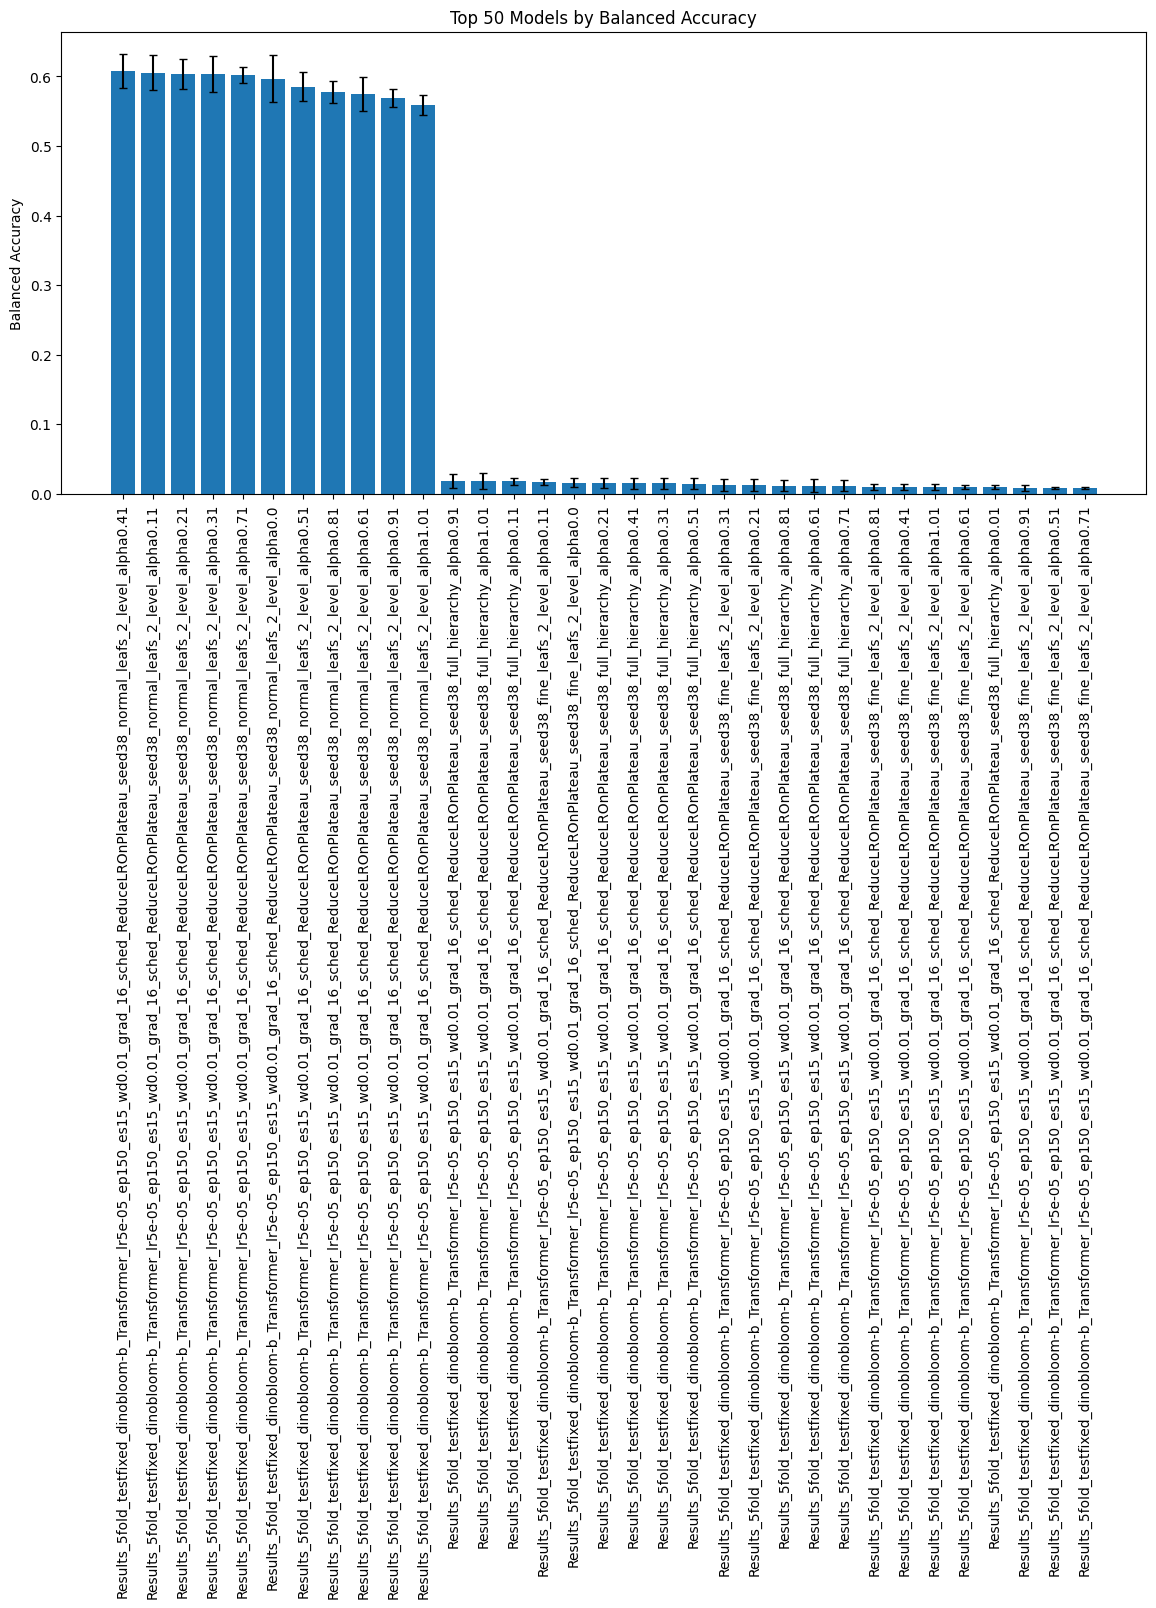

/tmp/ipykernel_2779902/2929829087.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


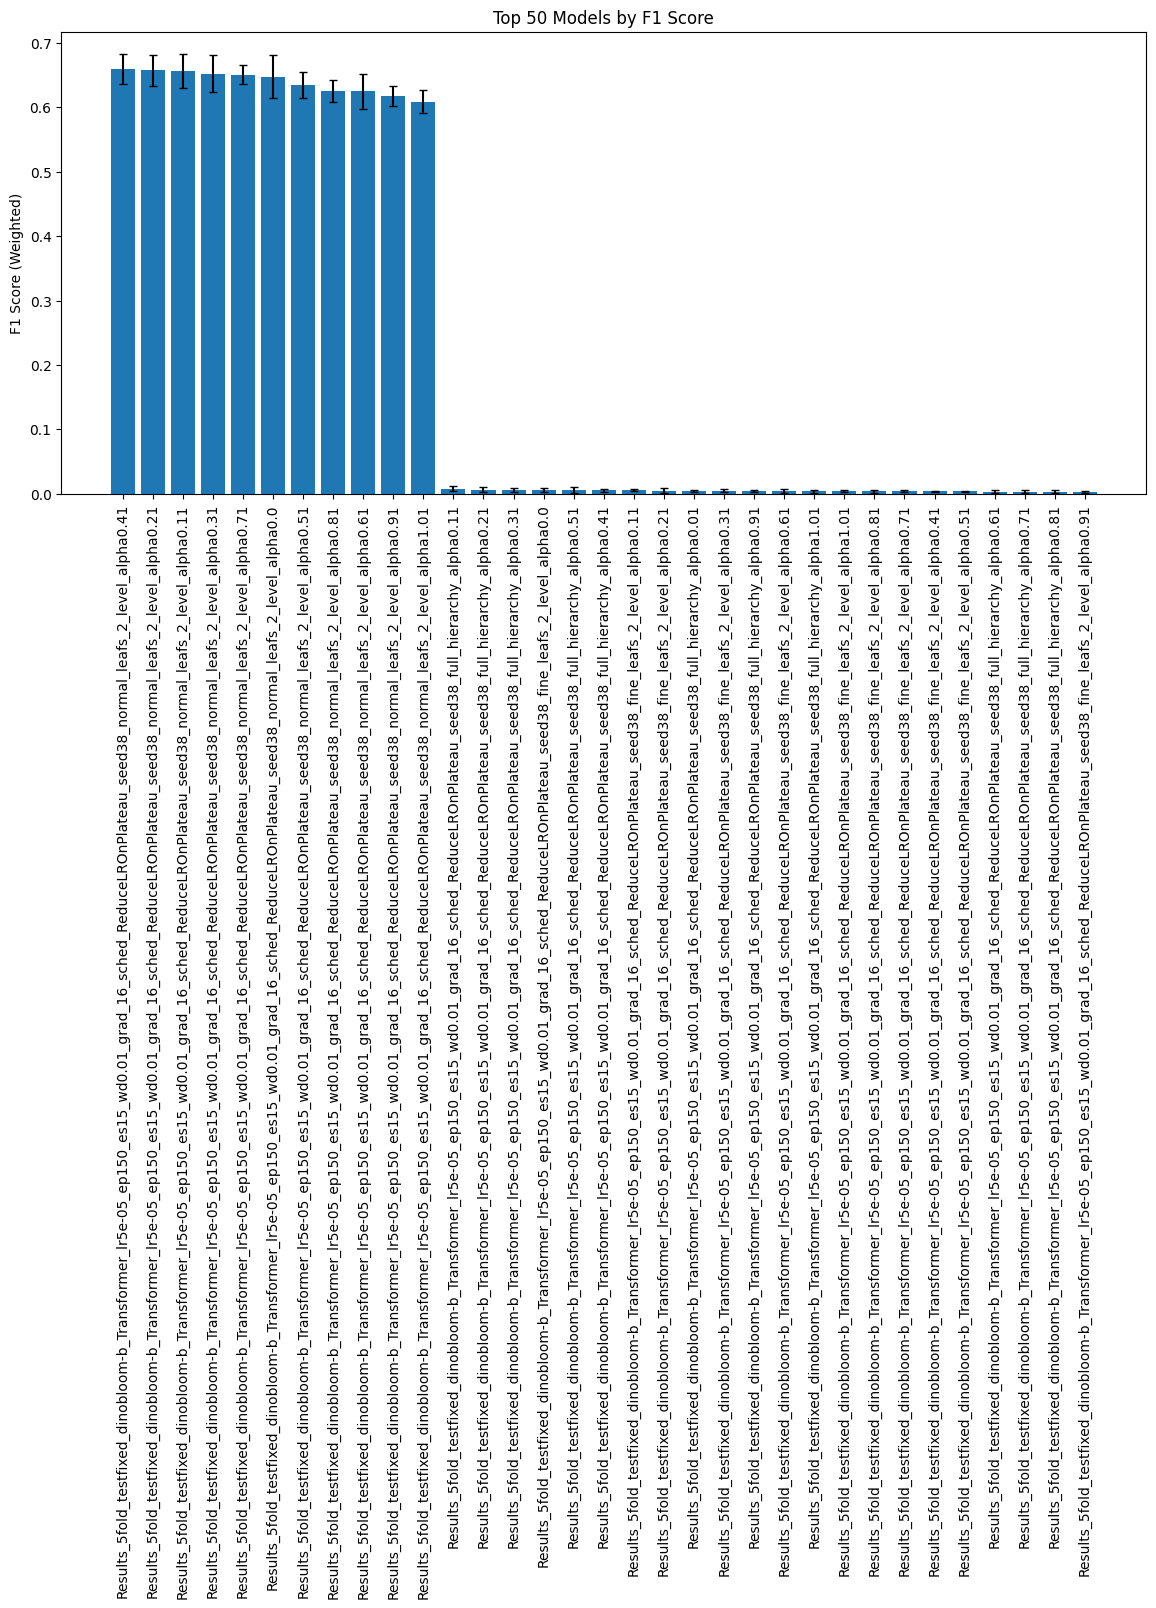

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame.from_dict(results_dict, orient='index')

# Sort and plot top 50 for balanced accuracy
top_bacc = df.sort_values('balanced_accuracy', ascending=False, key=lambda x: x.apply(lambda y: y[0])).head(50)
means_bacc = top_bacc['balanced_accuracy'].apply(lambda x: x[0])
stds_bacc = top_bacc['balanced_accuracy'].apply(lambda x: x[1])

plt.figure(figsize=(14, 6))
plt.bar(top_bacc.index, means_bacc, yerr=stds_bacc, capsize=3)
plt.xticks(rotation=90)
plt.ylabel("Balanced Accuracy")
plt.title("Top 50 Models by Balanced Accuracy")
plt.tight_layout()
plt.show()

# Sort and plot top 50 for F1 score
top_f1 = df.sort_values('f1_score', ascending=False, key=lambda x: x.apply(lambda y: y[0])).head(50)
means_f1 = top_f1['f1_score'].apply(lambda x: x[0])
stds_f1 = top_f1['f1_score'].apply(lambda x: x[1])

plt.figure(figsize=(14, 6))
plt.bar(top_f1.index, means_f1, yerr=stds_f1, capsize=3)
plt.xticks(rotation=90)
plt.ylabel("F1 Score (Weighted)")
plt.title("Top 50 Models by F1 Score")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import re

def clean_and_parse(pred_str):
    # Remove 'np.float32' and parse the list
    cleaned = re.sub(r'np\.float32\((.*?)\)', r'\1', pred_str)
    return [float(v) for v in eval(cleaned)]

result_folder = Path('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_repeat')
baccs = []
f1s = []
accs = []
label_to_diagnose = pd.read_csv('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/data_cross_val_8_classes/label_to_diagnose.csv')
for fold in range(5):
    test_metadata = pd.read_csv(result_folder / f'fold_{fold}' / 'metadata_results_test.csv')
    test_metadata['prediction'] = test_metadata['prediction'].apply(clean_and_parse)
    test_metadata['predicted_label'] = test_metadata['prediction'].apply(lambda x: np.argmax(x))
    b_acc = balanced_accuracy_score(test_metadata['label'], test_metadata['predicted_label'])
    f1 = f1_score(test_metadata['label'], test_metadata['predicted_label'], average='weighted')
    acc = accuracy_score(test_metadata['label'], test_metadata['predicted_label'])
    baccs.append(b_acc)
    f1s.append(f1)
    accs.append(acc)
    print(f"Fold {fold} - Balanced Accuracy: {b_acc:.4f}, F1 Score: {f1:.4f}, Accuracy: {acc:.4f}")

print(f"Mean Balanced Accuracy: {np.mean(baccs):.4f}, Std: {np.std(baccs):.4f}")
print(f"Mean F1 Score: {np.mean(f1s):.4f}, Std: {np.std(f1s):.4f}")
print(f"Mean Accuracy: {np.mean(accs):.4f}, Std: {np.std(accs):.4f}")

Fold 0 - Balanced Accuracy: 0.5845, F1 Score: 0.6208, Accuracy: 0.6406
Fold 1 - Balanced Accuracy: 0.6068, F1 Score: 0.6551, Accuracy: 0.6699
Fold 2 - Balanced Accuracy: 0.5977, F1 Score: 0.6445, Accuracy: 0.6601
Fold 3 - Balanced Accuracy: 0.5971, F1 Score: 0.6593, Accuracy: 0.6748
Fold 4 - Balanced Accuracy: 0.5844, F1 Score: 0.6436, Accuracy: 0.6650
Mean Balanced Accuracy: 0.5941, Std: 0.0086
Mean F1 Score: 0.6447, Std: 0.0134
Mean Accuracy: 0.6621, Std: 0.0118


In [42]:
# Read all folds and store predictions by filename
all_preds = {}
all_labels = {}
all_pred_vectors = {}

for fold in range(5):
    df = pd.read_csv(result_folder / f'fold_{fold}' / 'metadata_results_test.csv')
    df['prediction'] = df['prediction'].apply(clean_and_parse)

    for _, row in df.iterrows():
        filename = row['patient']
        pred_vector = np.array(row['prediction'])
        label = row['label']

        if filename not in all_preds:
            all_preds[filename] = []
            all_labels[filename] = label
        all_preds[filename].append(pred_vector)

# Ensemble prediction: average the softmax vectors
final_preds = []
true_labels = []

for filename in all_preds:
    mean_pred = np.mean(all_preds[filename], axis=0)
    final_label = np.argmax(mean_pred)
    final_preds.append(final_label)
    true_labels.append(all_labels[filename])

# Compute metrics
b_acc = balanced_accuracy_score(true_labels, final_preds)
f1 = f1_score(true_labels, final_preds, average='weighted')
acc = accuracy_score(true_labels, final_preds)
conf_matrix = confusion_matrix(true_labels, final_preds)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
print(f"Ensemble Balanced Accuracy: {b_acc:.4f}")
print(f"Ensemble F1 Score: {f1:.4f}")
print(f"Ensemble Accuracy: {acc:.4f}")

Ensemble Balanced Accuracy: 0.6619
Ensemble F1 Score: 0.7032
Ensemble Accuracy: 0.7164


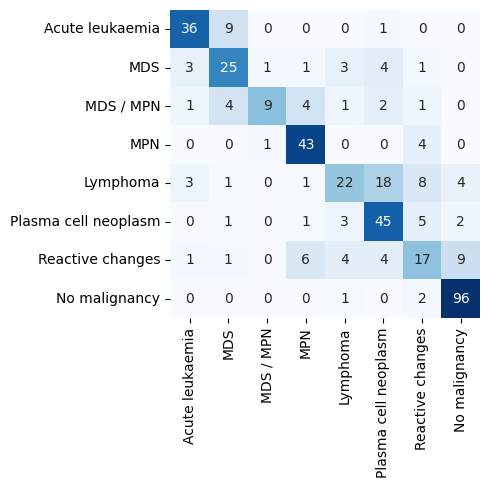

In [48]:
plt.figure(figsize=(4, 4))
sns.heatmap(normalized_conf_matrix, annot=conf_matrix, fmt='d', cmap='Blues',
            xticklabels=label_to_diagnose.diagnose.values, yticklabels=label_to_diagnose.diagnose.values, cbar=False)
plt.show()

,diagnose,label
0,Acute leukaemia,0
1,MDS,1
2,MDS / MPN,2
3,MPN,3
4,Lymphoma,4
5,Plasma cell neoplasm,5
6,Reactive changes,6
7,No malignancy,7


In [28]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score, confusion_matrix
import re
import seaborn as sns

def clean_and_parse(pred_str):
    # Remove 'np.float32' and parse the list
    cleaned = re.sub(r'np\.float32\((.*?)\)', r'\1', pred_str)
    return [float(v) for v in eval(cleaned)]

baccs = []
f1s = []
accs = []
for fold in range(5):
    result_folder = Path(f'/lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/cAItomorph_Fatih/Results_fold_AML_Hehr_Transformer-{fold}')
    test_metadata = pd.read_csv(result_folder / 'metadata_results_test.csv')
    test_metadata['prediction'] = test_metadata['prediction'].apply(clean_and_parse)
    test_metadata['predicted_label'] = test_metadata['prediction'].apply(lambda x: np.argmax(x))
    test_metadata['label'] = test_metadata['label'].apply(lambda x: 0 if x!=4 else 7)
    b_acc = balanced_accuracy_score(test_metadata['label'], test_metadata['predicted_label'])
    f1 = f1_score(test_metadata['label'], test_metadata['predicted_label'], average='weighted')
    acc = accuracy_score(test_metadata['label'], test_metadata['predicted_label'])
    baccs.append(b_acc)
    f1s.append(f1)
    accs.append(acc)
    print(f"Fold {fold} - Balanced Accuracy: {b_acc:.4f}, F1 Score: {f1:.4f}, Accuracy: {acc:.4f}")

print(f"Mean Balanced Accuracy: {np.mean(baccs):.4f}, Std: {np.std(baccs):.4f}")
print(f"Mean F1 Score: {np.mean(f1s):.4f}, Std: {np.std(f1s):.4f}")
print(f"Mean Accuracy: {np.mean(accs):.4f}, Std: {np.std(accs):.4f}")

Fold 0 - Balanced Accuracy: 0.6196, F1 Score: 0.8077, Accuracy: 0.7302
Fold 1 - Balanced Accuracy: 0.6395, F1 Score: 0.8222, Accuracy: 0.7513
Fold 2 - Balanced Accuracy: 0.6085, F1 Score: 0.7991, Accuracy: 0.7090
Fold 3 - Balanced Accuracy: 0.6607, F1 Score: 0.8366, Accuracy: 0.7619
Fold 4 - Balanced Accuracy: 0.6035, F1 Score: 0.7958, Accuracy: 0.7143
Mean Balanced Accuracy: 0.6264, Std: 0.0212
Mean F1 Score: 0.8123, Std: 0.0152
Mean Accuracy: 0.7333, Std: 0.0205


/home/icb/muhammed.dasdelen/miniconda3/envs/dinov2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/icb/muhammed.dasdelen/miniconda3/envs/dinov2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/icb/muhammed.dasdelen/miniconda3/envs/dinov2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/icb/muhammed.dasdelen/miniconda3/envs/dinov2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/icb/muhammed.dasdelen/miniconda3/envs/dinov2/lib/python3.10/site-packages/skle

/home/icb/muhammed.dasdelen/miniconda3/envs/dinov2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/tmp/ipykernel_3783453/4016490651.py:37: RuntimeWarning: invalid value encountered in divide
  normalized_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]


Ensemble Balanced Accuracy: 0.6490
Ensemble F1 Score: 0.8281
Ensemble Accuracy: 0.7460


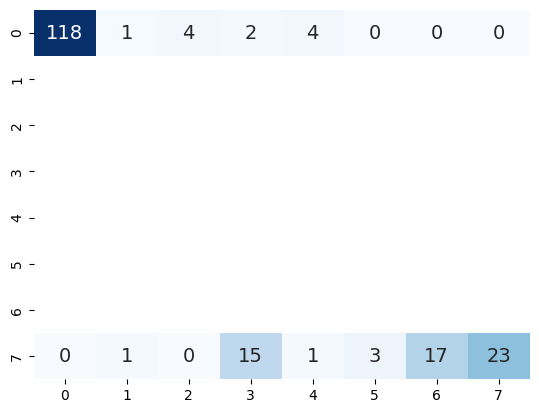

In [29]:
# Read all folds and store predictions by filename
all_preds = {}
all_labels = {}
all_pred_vectors = {}

for fold in range(5):
    result_folder = Path(f'/lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/cAItomorph_Fatih/Results_fold_AML_Hehr_Transformer-{fold}')
    df = pd.read_csv(result_folder / 'metadata_results_test.csv')
    df['prediction'] = df['prediction'].apply(clean_and_parse)
    df['label'] = df['label'].apply(lambda x: 0 if x!=4 else 7)

    for _, row in df.iterrows():
        filename = row['patient']
        pred_vector = np.array(row['prediction'])
        label = row['label']

        if filename not in all_preds:
            all_preds[filename] = []
            all_labels[filename] = label
        all_preds[filename].append(pred_vector)

# Ensemble prediction: average the softmax vectors
final_preds = []
true_labels = []

for filename in all_preds:
    mean_pred = np.mean(all_preds[filename], axis=0)
    final_label = int(np.argmax(mean_pred))
    final_preds.append(final_label)
    true_labels.append(all_labels[filename])

# Compute metrics
b_acc = balanced_accuracy_score(true_labels, final_preds)
f1 = f1_score(true_labels, final_preds, average='weighted')
acc = accuracy_score(true_labels, final_preds)
confusion_matrix = confusion_matrix(true_labels, final_preds)
normalized_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_confusion_matrix, annot=confusion_matrix, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 14})

print(f"Ensemble Balanced Accuracy: {b_acc:.4f}")
print(f"Ensemble F1 Score: {f1:.4f}")
print(f"Ensemble Accuracy: {acc:.4f}")

In [6]:

from collections import Counter

# Store predictions and labels per sample
all_preds = {}
all_pred_vectors = {}
all_labels = {}

for fold in range(5):
    df = pd.read_csv(result_folder / f'fold_{fold}' / 'metadata_results_test.csv')
    df['prediction'] = df['prediction'].apply(ast.literal_eval)
    df['predicted_label'] = df['prediction'].apply(lambda x: np.argmax(x))

    for _, row in df.iterrows():
        filename = row['patient']
        pred_vector = np.array(row['prediction'])
        pred_label = row['predicted_label']
        label = row['label']

        all_preds.setdefault(filename, []).append(pred_label)
        all_pred_vectors.setdefault(filename, []).append(pred_vector)
        all_labels[filename] = label

# Final prediction using majority voting
final_preds = []
true_labels = []

for filename in all_preds:
    votes = all_preds[filename]
    vote_counts = Counter(votes)
    most_common = vote_counts.most_common()
    
    # Check for tie
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        # Tie: fall back to mean prediction vector
        mean_vector = np.mean(all_pred_vectors[filename], axis=0)
        final_label = np.argmax(mean_vector)
    else:
        # No tie: use majority vote
        final_label = most_common[0][0]
    
    final_preds.append(final_label)
    true_labels.append(all_labels[filename])

# Compute ensemble metrics
b_acc = balanced_accuracy_score(true_labels, final_preds)
f1 = f1_score(true_labels, final_preds, average='weighted')

print(f"Majority Voting Balanced Accuracy: {b_acc:.4f}")
print(f"Majority Voting F1 Score: {f1:.4f}")


Majority Voting Balanced Accuracy: 0.6038
Majority Voting F1 Score: 0.6496


In [68]:
import os
csv_root = '/lustre/groups/labs/marr/qscd01/workspace/furkan.dasdelen/cAItomorph_Fatih/data_cross_val_8_classes'
t_files = pd.read_csv(os.path.join(csv_root,f'data_fold_1',"train.csv"))
v_files = pd.read_csv(os.path.join(csv_root,f'data_fold_1',"val.csv"))
test_files = pd.read_csv(os.path.join(csv_root,f'data_fold_1',"test.csv"))
train_val_files = pd.concat([t_files, v_files], ignore_index=True)

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import shutil
from pathlib import Path
from multiprocessing import Pool, cpu_count
from tqdm import tqdm
import os

from_path = Path('/lustre/groups/labs/marr/qscd01/datasets/210526_mll_mil_pseudonymized/data_after_cleaning')
to_path = Path('/lustre/groups/labs/marr/qscd01/datasets/210526_mll_mil_pseudonymized/data_after_cleaning_alltogether')
to_path.mkdir(parents=True, exist_ok=True)

# Create list of all (source, destination) pairs
file_pairs = []
for disease_folder in from_path.iterdir():
    if disease_folder.is_dir():
        for patient_folder in disease_folder.iterdir():
            if patient_folder.is_dir():
                for file in patient_folder.glob('*.TIF'):
                    to_patient = to_path / patient_folder.name
                    file_pairs.append((file, to_patient / file.name))

# Define the copy function
def copy_file(args):
    src, dst = args
    dst.parent.mkdir(parents=True, exist_ok=True)
    shutil.copy2(src, dst)

number_of_processes = 48 if os.cpu_count() > 48 else os.cpu_count()
# Run in parallel with progress bar
if __name__ == '__main__':
    with Pool(processes=number_of_processes) as pool:
        list(tqdm(pool.imap_unordered(copy_file, file_pairs), total=len(file_pairs)))

100%|██████████| 81214/81214 [01:09<00:00, 1176.37it/s]


In [8]:
from loss_functions.hierarchical_loss_3_level import HierarchicalLoss_3_Level
from loss_functions.hierarchical_loss_2_level import HierarchicalLoss_2_Level

In [9]:
def extract_confusion_matrix(cm):
    y_true=[]
    y_pred=[]
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            y_true.extend([i]*int(cm[i][j]))
            y_pred.extend([j]*int(cm[i][j]))
                

    return y_true, y_pred

In [12]:
import yaml
hierarchy_file = '/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/hierarchy/full_hierarchy'
with open(f"{hierarchy_file}.yaml") as f:
    hierarchy_config = yaml.safe_load(f)

hierarchy=hierarchy_config["hierarchy"]
    
loss_function=HierarchicalLoss_3_Level(hierarchy,device='cpu',alpha=1)
T21_numpy = loss_function.T21.detach().cpu().numpy()


In [13]:
import yaml
import dataframe_image as dfi
results_root_path = Path('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results')
results_folders = list(results_root_path.glob('Results_5fold*'))

In [15]:
import yaml
import dataframe_image as dfi
results_root_path = Path('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results')
results_folders = list(results_root_path.glob('Results_5fold*'))
class_names=pd.read_csv('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/data_cross_val_8_classes/label_to_diagnose.csv').diagnose.values
for run_folder in results_folders:
    reduced_stats, per_fold = [], []

    # ---------------- aggregate per-fold stats ------------------------------
    for fold in range(5):
        cm = np.load(run_folder / f"fold_{fold}" / "test_conf_matrix.npy")   # 8×8
        reduced = cm @ T21_numpy                                             # 8×2 counts

        mal, nonmal = reduced[:, 0], reduced[:, 1]
        totals      = mal + nonmal

        correct     = np.where(np.arange(8) < 6, mal, nonmal)                # first 6 → mal
        specificity = correct / totals

        per_fold.append(np.stack([mal, nonmal, specificity], axis=1))

    arr       = np.stack(per_fold, axis=0)          # (5, 8, 3)
    mean_vals = arr.mean(axis=0)                    # (8, 3)
    std_vals  = arr.std(axis=0, ddof=1)             # sample std

    # ---------------- DataFrame --------------------------------------------
    df = pd.DataFrame({
        "Class":              class_names,
        "Mean Malignant":     mean_vals[:, 0],
        "Std Malignant":      std_vals [:, 0],
        "Mean Non-Malignant": mean_vals[:, 1],
        "Std Non-Malignant":  std_vals [:, 1],
        "Mean Specificity":   mean_vals[:, 2],
        "Std Specificity":    std_vals [:, 2],
    }).round(3)

    # ---------------- output folder ----------------------------------------
    out = Path(run_folder) / "summary"
    out.mkdir(parents=True, exist_ok=True)

    # 1️⃣  CSV (unchanged) ---------------------------------------------------
    csv_path = out / "binary_metrics_summary.csv"
    df.to_csv(csv_path, index=False)
    print(f"✓ CSV   → {csv_path}")

    style = (
        df.style
          .format("{:.3f}", subset=df.columns[1:])
          .set_table_styles([{"selector":"th","props":[("font-weight","bold")]}])
    )

    try:
        png_table_path = out / "binary_metrics_summary_table.png"
        dfi.export(
        style,
        png_table_path,
        table_conversion="matplotlib",   # <-- key line
        dpi=300,
    )         # screenshot of styled table
        print(f"✓ PNG table → {png_table_path}")
    except Exception as e:
        print("⚠ dataframe_image not available; skipping PNG table:", e)


  


✓ CSV   → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.71/summary/binary_metrics_summary.csv


✓ PNG table → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.71/summary/binary_metrics_summary_table.png
✓ CSV   → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha1.01/summary/binary_metrics_summary.csv
✓ PNG table → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha1.01/summary/binary_metrics_summary_table.png
✓ CSV   → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5

In [16]:
class_names = pd.read_csv('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/data_cross_val_8_classes/label_to_diagnose.csv').diagnose.values
for result_folder in results_folders:
    recalls, precisions, f1s = [], [], []

    for fold in range(5):
        cm = np.load(result_folder / f"fold_{fold}" / "test_conf_matrix.npy")

        # true positives, false positives, false negatives per class
        tp = np.diag(cm)
        fp = cm.sum(axis=0) - tp
        fn = cm.sum(axis=1) - tp

        # safe precision: TP / (TP+FP), but 0 when TP+FP == 0
        precision = np.divide(
            tp,
            tp + fp,
            out=np.zeros_like(tp, dtype=float),
            where=(tp + fp) != 0
        )

        # safe recall: TP / (TP+FN), but 0 when TP+FN == 0
        recall = np.divide(
            tp,
            tp + fn,
            out=np.zeros_like(tp, dtype=float),
            where=(tp + fn) != 0
        )

        # safe F1: 2 * p * r / (p + r), but 0 when p+r == 0
        f1 = np.divide(
            2 * precision * recall,
            precision + recall,
            out=np.zeros_like(tp, dtype=float),
            where=(precision + recall) != 0
        )

        recalls.append(recall)
        precisions.append(precision)
        f1s.append(f1)

    # stack folds → (n_folds, n_classes)
    recalls    = np.vstack(recalls)
    precisions = np.vstack(precisions)
    f1s        = np.vstack(f1s)

    # build DataFrame of mean ± stddev
    df_numeric = pd.DataFrame(
        {
            "Recall (μ)":    recalls.mean(axis=0),
            "Recall (σ)":    recalls.std(axis=0, ddof=1),
            "Precision (μ)": precisions.mean(axis=0),
            "Precision (σ)": precisions.std(axis=0, ddof=1),
            "F1 (μ)":        f1s.mean(axis=0),
            "F1 (σ)":        f1s.std(axis=0, ddof=1),
        },
        index=class_names,
    )

    # output to summary folder
    out_dir = result_folder / "summary"
    out_dir.mkdir(parents=True, exist_ok=True)

    # 1️⃣ CSV
    df_numeric.to_csv(out_dir / "class_metrics.csv", float_format="%.3f")

    # 2️⃣ Styled HTML + PNG
    style = (
        df_numeric.style
                  .format("{:.3f}")
                  .set_table_styles([
                      {"selector": "th",       "props": [("font-weight", "bold")]},
                      {"selector": "thead td", "props": [("font-weight", "bold")]},
                      {"selector": "tbody tr:hover",
                       "props": [("background-color", "#ffffdd")]},
                  ])
    )
    png_path = out_dir / "class_metrics_table_final.png"
    try:
        dfi.export(style, png_path, table_conversion="matplotlib", dpi=300)
        print(f"✓ PNG   → {png_path}")
    except Exception as e:
        print("⚠ dataframe_image export skipped:", e)

✓ PNG   → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.71/summary/class_metrics_table_final.png
✓ PNG   → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha1.01/summary/class_metrics_table_final.png
✓ PNG   → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha0.11/summary/class_metrics_table_final.png
✓ PNG   → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
binary_class_names = ["Malignant", "Non-Malignant"]  
full_class_names = pd.read_csv('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/data_cross_val_8_classes/label_to_diagnose.csv').diagnose.values
results_root_path = Path('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results')
results_folders = list(results_root_path.glob('Results_5fold*'))            
for result_folder in results_folders:

    # ---------------- collect per-fold raw CMs --------------------------------
    cm_raw_folds      = []          # 8×8
    binary_cm_raw     = []          # 2×2

    for fold in range(5):
        cm = np.load(result_folder / f"fold_{fold}" / "test_conf_matrix.npy")
        cm_raw_folds.append(cm)

        # 2×2 collapse
        binary_cm_raw.append(T21_numpy.T @ cm @ T21_numpy)

    cm_raw_folds  = np.stack(cm_raw_folds, axis=0)       # (5, 8, 8)
    binary_cm_raw = np.stack(binary_cm_raw,  axis=0)     # (5, 2, 2)

    # ---------------- row-normalise each fold ---------------------------------
    with np.errstate(divide="ignore", invalid="ignore"):
        norm_cm_folds      = cm_raw_folds  / cm_raw_folds.sum(axis=2, keepdims=True)
        norm_bin_cm_folds  = binary_cm_raw / binary_cm_raw.sum(axis=2, keepdims=True)

    norm_cm_folds     = np.nan_to_num(norm_cm_folds)
    norm_bin_cm_folds = np.nan_to_num(norm_bin_cm_folds)

    # ---------------- stats across 5 folds ------------------------------------
    cm_mean      = norm_cm_folds.mean(axis=0)
    cm_std       = norm_cm_folds.std(axis=0, ddof=1)

    bin_cm_mean  = norm_bin_cm_folds.mean(axis=0)
    bin_cm_std   = norm_bin_cm_folds.std(axis=0, ddof=1)

    # ---------------- helper: label overlay -----------------------------------
    def make_label(mat_mean, mat_std, fmt=".2f"):
        labels = np.empty_like(mat_mean, dtype=object)
        for i in range(mat_mean.shape[0]):
            for j in range(mat_mean.shape[1]):
                labels[i, j] = f"{mat_mean[i, j]:{fmt}}\n±{mat_std[i, j]:{fmt}}"
        return labels

    bin_labels = make_label(bin_cm_mean, bin_cm_std)
    full_labels = make_label(cm_mean, cm_std)

    # ---------------- output dir ----------------------------------------------
    out_dir = result_folder / "summary"
    out_dir.mkdir(parents=True, exist_ok=True)

    # --------------------------------------------------------------------------
    # 1) 2×2 binary heat-map (already worked for you; kept here for completeness)
    fig2, ax2 = plt.subplots(figsize=(6, 5))
    sns.heatmap(
        bin_cm_mean,
        ax=ax2, cmap="YlGnBu", vmin=0, vmax=1,
        annot=bin_labels, fmt="",
        xticklabels=binary_class_names, yticklabels=binary_class_names,
        cbar_kws={"label": "mean"}
    )
    ax2.set_title("Binary normalised CM (mean ± SD)")
    fig2.savefig(out_dir / "cm_mean_plus_sd_overlay_binary.png", dpi=300)
    plt.close(fig2)

    h = 0.6 * len(full_class_names) + 2
    fig3, ax3 = plt.subplots(figsize=(h, h))
    sns.heatmap(
        cm_mean,
        ax=ax3, cmap="YlGnBu", vmin=0, vmax=1,
        annot=full_labels, fmt="",
        xticklabels=full_class_names, yticklabels=full_class_names,
        cbar_kws={"label": "mean"}
    )
    ax3.set_title("8-class normalised CM (mean ± SD)")
    fig3.savefig(out_dir / "cm_mean_plus_sd_overlay_full.png", dpi=300)
    plt.close(fig3)

    print(f"✓ Saved binary & full CM heat-maps to {out_dir}")

✓ Saved binary & full CM heat-maps to /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.71/summary
✓ Saved binary & full CM heat-maps to /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha1.01/summary
✓ Saved binary & full CM heat-maps to /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha0.11/summary


✓ Saved binary & full CM heat-maps to /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.51/summary
✓ Saved binary & full CM heat-maps to /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.01/summary
✓ Saved binary & full CM heat-maps to /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha0.51/summary
✓ Saved binary & full CM heat-maps to /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transf

In [18]:
for result_folder in results_folders:
    baccs_bin, wf1s_bin, accs_bin = [], [], []
    baccs_full, wf1s_full, accs_full = [], [], []
    # --------------------------------------------------- per-fold metrics ---
    for fold in range(5):
        cm = np.load(result_folder / f"fold_{fold}" / "test_conf_matrix.npy")
        binary_cm = T21_numpy.T @ cm @ T21_numpy        # 2×2
        y_true_bin, y_pred_bin = extract_confusion_matrix(binary_cm)
        y_true_full, y_pred_full = extract_confusion_matrix(cm)
        
        # 8-class metrics
        bacc_full = balanced_accuracy_score(y_true_full, y_pred_full)
        wf1_full  = f1_score(y_true_full, y_pred_full, average="weighted")
        acc_full  = accuracy_score(y_true_full, y_pred_full)
        baccs_full.append(bacc_full)
        wf1s_full.append(wf1_full)
        accs_full.append(acc_full)

        # 2-class metrics
        bacc_bin = balanced_accuracy_score(y_true_bin, y_pred_bin)
        wf1_bin  = f1_score(y_true_bin, y_pred_bin, average="weighted")
        acc_bin  = accuracy_score(y_true_bin, y_pred_bin)    
        baccs_bin.append(bacc_bin)
        wf1s_bin.append(wf1_bin)
        accs_bin.append(acc_bin)

    # --------------------------------------------------- mean & SD ----------
    mu_bacc_bin, sd_bacc_bin = np.mean(baccs_bin), np.std(baccs_bin, ddof=1)
    mu_wf1_bin,  sd_wf1_bin  = np.mean(wf1s_bin),  np.std(wf1s_bin,  ddof=1)
    mu_acc_bin,  sd_acc_bin   = np.mean(accs_bin),  np.std(accs_bin,  ddof=1)

    print(f"Balanced Accuracy: {mu_bacc_bin:.4f} ± {sd_bacc_bin:.4f}")
    print(f"Weighted  F1     : {mu_wf1_bin :.4f} ± {sd_wf1_bin :.4f}")
    print(f"Accuracy         : {mu_acc_bin :.4f} ± {sd_acc_bin :.4f}")
    
    
    mu_bacc_full, sd_bacc_full = np.mean(baccs_full), np.std(baccs_full, ddof=1)
    mu_wf1_full,  sd_wf1_full  = np.mean(wf1s_full),  np.std(wf1s_full,  ddof=1)
    mu_acc_full,  sd_acc_full   = np.mean(accs_full),  np.std(accs_full,  ddof=1)
     
    print(f"Full Balanced Accuracy: {mu_bacc_full:.4f} ± {sd_bacc_full:.4f}")
    print(f"Full Weighted  F1     : {mu_wf1_full :.4f} ± {sd_wf1_full :.4f}")
    print(f"Full Accuracy         : {mu_acc_full :.4f} ± {sd_acc_full :.4f}")

    # --------------------------------------------------- output dir ---------
    out_dir = result_folder / "summary"
    out_dir.mkdir(parents=True, exist_ok=True)

    # 1️⃣  CSV ---------------------------------------------------------------
    df_bin = pd.DataFrame(
        {
            "Metric": ["Balanced Accuracy", "Weighted F1", "Accuracy"],
            "Mean":   [mu_bacc_bin, mu_wf1_bin, mu_acc_bin],
            "Std":    [sd_bacc_bin, sd_wf1_bin, sd_acc_bin],
        }
    )
    df_full = pd.DataFrame(
        {
            "Metric": ["Balanced Accuracy", "Weighted F1", "Accuracy"],
            "Mean":   [mu_bacc_full, mu_wf1_full, mu_acc_full],
            "Std":    [sd_bacc_full, sd_wf1_full, sd_acc_full],
        }
    )

    csv_path_bin = out_dir / "overall_metrics_binary.csv"
    csv_path_full = out_dir / "overall_metrics_full.csv"    
    df_full.to_csv(csv_path_full, index=False, float_format="%.4f")
    df_bin.to_csv(csv_path_bin, index=False, float_format="%.4f")
    print(f"✓ CSV  → {csv_path_bin}")

    style_bin = (
        df_bin.style
        .format({"Mean": "{:.4f}", "Std": "{:.4f}"})
        .set_table_styles(
            [
                {"selector": "th", "props": [("font-weight", "bold")]},
                {"selector": "tbody tr:hover", "props": [("background-color", "#ffffdd")]},
            ]
        )
    )
    style_full = (
        df_full.style
        .format({"Mean": "{:.4f}", "Std": "{:.4f}"})
        .set_table_styles(
            [
                {"selector": "th", "props": [("font-weight", "bold")]},
                {"selector": "tbody tr:hover", "props": [("background-color", "#ffffdd")]},
            ]
        )
    )


    png_table_path_bin = out_dir / "overall_metrics_table_binary.png"
    png_table_path_full = out_dir / "overall_metrics_table_full.png"
    try:
        dfi.export(style_bin, png_table_path_bin, table_conversion="matplotlib", dpi=300)
        dfi.export(style_full, png_table_path_full, table_conversion="matplotlib", dpi=300)
        print(f"✓ PNG table → {png_table_path}")
    except Exception as e:
        print("⚠ dataframe_image PNG skipped:", e)



Balanced Accuracy: 0.8898 ± 0.0102
Weighted  F1     : 0.9024 ± 0.0066
Accuracy         : 0.9027 ± 0.0063
Full Balanced Accuracy: 0.6024 ± 0.0132
Full Weighted  F1     : 0.6506 ± 0.0161
Full Accuracy         : 0.6685 ± 0.0163
✓ CSV  → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.71/summary/overall_metrics_binary.csv
✓ PNG table → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha0.91/summary/binary_metrics_summary_table.png
Balanced Accuracy: 0.8982 ± 0.0067
Weighted  F1     : 0.9037 ± 0.0087
Accuracy         : 0.9032 ± 0.0092
Full Balanced Accuracy: 0.5723 ± 0.0156
Full Weighted  F1     : 0.6191 ± 0.0146
Full Accuracy         :

In [19]:
test_diagnose_csv=pd.read_csv('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/data_cross_val_8_classes/data_fold_1/test.csv')
for result_folder in results_folders:
    for fold in range(5):
        test_metadata = pd.read_csv(result_folder / f'fold_{fold}' / 'metadata_results_test.csv')
        print(test_metadata.columns)
        for i, row in test_metadata.iterrows():
            patient_name = row['patient']  # Use dictionary-style access
            if patient_name in test_diagnose_csv['patient_files'].values:  # Ensure column name matches
                diagnose = test_diagnose_csv[test_diagnose_csv['patient_files'] == patient_name].diagnose.values[0]
                test_metadata.at[i, 'diagnose'] = diagnose
            else:
                raise ValueError(f"Patient {patient_name} not found in test_diagnose_csv")
        test_metadata.to_csv(result_folder / f'fold_{fold}' / 'metadata_results_test.csv', index=False)
            


Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patient', 'label', 'prediction'], dtype='object')
Index(['patien

In [21]:
import ast, re, glob, numpy as np, pandas as pd
from pathlib import Path
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    f1_score,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi          # pip install dataframe_image

# ──────────────────────────── helpers ──────────────────────────────────────
def clean_and_parse(pred_str: str):
    """Convert '[np.float32(0.12), …]'  →  [0.12, …]."""
    stripped = re.sub(r"np\.float32\((.*?)\)", r"\1", pred_str)
    return list(ast.literal_eval(stripped))

# experiment folders --------------------------------------------------------
results_full_hierarchy = sorted(
    glob.glob(
        "/lustre/groups/labs/marr/qscd01/workspace/"
        "fatih.oezluegedik/cAItomorph_Fatih/final_results/"
        "Results_5fold_testfixed_dinobloom-b_Transformer_"
        "lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_"
        "seed38_full_hierarchy_alpha*"
    )
)
loss_function = HierarchicalLoss_3_Level(hierarchy, device="cpu", alpha=1)
leaf_to_idx   = loss_function.leaf_to_idx
idx_to_leaf   = {v: k for k, v in leaf_to_idx.items()}   # for axis labels
n_classes     = len(leaf_to_idx)

# ──────────────────────────── main loop ────────────────────────────────────
for exp_path in results_full_hierarchy:
    result_folder = Path(exp_path)
    b_accs, accs, f1s, cm_folds = [], [], [], []

    # 5-fold evaluation -----------------------------------------------------
    for fold in range(5):
        meta = pd.read_csv(result_folder / f"fold_{fold}" / "metadata_results_test.csv")
        meta["prediction"]      = meta["prediction"].apply(clean_and_parse)
        meta["predicted_label"] = meta["prediction"].apply(np.argmax)
        meta["diagnose"]        = meta["diagnose"].map(leaf_to_idx)

        # metrics
        y_true, y_pred = meta["diagnose"], meta["predicted_label"]
        b_accs.append(balanced_accuracy_score(y_true, y_pred))
        accs.append(accuracy_score(y_true, y_pred))
        f1s.append(f1_score(y_true, y_pred, average="weighted"))

        # confusion matrix
        cm = confusion_matrix(y_true, y_pred, labels=range(n_classes))
        cm_folds.append(cm)

    # ─── metrics table (PNG via dfi) ───────────────────────────────────────
    stats_df = pd.DataFrame(
        {
            "Metric": ["Balanced Accuracy", "Accuracy", "Weighted F1"],
            "Mean": [
                np.mean(b_accs),
                np.mean(accs),
                np.mean(f1s),
            ],
            "Std": [
                np.std(b_accs, ddof=1),
                np.std(accs,  ddof=1),
                np.std(f1s,  ddof=1),
            ],
        }
    ).round(4)

    styled = (
        stats_df.style
        .format({"Mean": "{:.4f}", "Std": "{:.4f}"})
        
        .set_table_styles(
            [
                {"selector": "th", "props": [("font-weight", "bold")]},
                {"selector": "tbody tr:hover", "props": [("background-color", "#ffffdd")]},
            ]
        )
    )

    out_dir = result_folder / "summary"
    out_dir.mkdir(parents=True, exist_ok=True)

    dfi.export(
        styled,
        out_dir / "3_level_metrics_table.png",
        table_conversion="matplotlib",
        dpi=300,
    )
    print(f"✓ Metrics PNG saved → {out_dir/'3_level_metrics_table.png'}")

    # ─── confusion-matrix mean ± SD heat-map ──────────────────────────────
    cm_folds      = np.stack(cm_folds, axis=0)                     # (5, n, n)

    # row-wise normalisation per fold
    with np.errstate(divide="ignore", invalid="ignore"):
        norm_cms = cm_folds / cm_folds.sum(axis=2, keepdims=True)
    norm_cms = np.nan_to_num(norm_cms)

    cm_mean = norm_cms.mean(axis=0)
    cm_std  = norm_cms.std(axis=0, ddof=1)

    # label overlay
    labels = np.empty_like(cm_mean, dtype=object)
    for i in range(n_classes):
        for j in range(n_classes):
            labels[i, j] = f"{cm_mean[i, j]:.2f}\n±{cm_std[i, j]:.2f}"

    fig_h, ax_h = plt.subplots(
        figsize=(0.6 * n_classes + 2, 0.6 * n_classes + 2)
    )
    sns.heatmap(
        cm_mean,
        ax=ax_h,
        cmap="YlGnBu",
        vmin=0,
        vmax=1,
        annot=labels,
        fmt="",
        xticklabels=[idx_to_leaf[i] for i in range(n_classes)],
        yticklabels=[idx_to_leaf[i] for i in range(n_classes)],
        cbar_kws={"label": "mean"},
    )
    ax_h.set_xlabel("Predicted")
    ax_h.set_ylabel("True")
    ax_h.set_title("Normalised confusion matrix\n(mean ± SD across 5 folds)")
    cm_png = out_dir / "confusion_matrix_mean_18x18.png"
    fig_h.savefig(cm_png, dpi=300, bbox_inches="tight")
    plt.close(fig_h)

    print(f"✓ Confusion-matrix PNG saved → {cm_png}\n")

✓ Metrics PNG saved → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.01/summary/3_level_metrics_table.png


✓ Confusion-matrix PNG saved → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.01/summary/confusion_matrix_mean_18x18.png

✓ Metrics PNG saved → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.11/summary/3_level_metrics_table.png
✓ Confusion-matrix PNG saved → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.11/summary/confusion_matrix_mean_18x18.png

✓ Metrics PNG saved → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/

In [22]:
from igraph import summary
import ast, re, glob, numpy as np, pandas as pd
from pathlib import Path
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    f1_score,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sympy import N          # pip install dataframe_image

# ──────────────────────────── helpers ──────────────────────────────────────
def clean_and_parse(pred_str: str):
    """Convert '[np.float32(0.12), …]'  →  [0.12, …]."""
    stripped = re.sub(r"np\.float32\((.*?)\)", r"\1", pred_str)
    return list(ast.literal_eval(stripped))

# experiment folders --------------------------------------------------------
results_full_hierarchy = ["/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.4"]
loss_function = HierarchicalLoss_3_Level(hierarchy, device="cuda", alpha=1)
leaf_to_idx   = loss_function.leaf_to_idx
idx_to_leaf   = {v: k for k, v in leaf_to_idx.items()}   # for axis labels
n_classes     = len(leaf_to_idx)

# ──────────────────────────── main loop ────────────────────────────────────
for exp_path in results_full_hierarchy:
    result_folder = Path(exp_path)

    cm_folds = []   # ← make sure you reset this per experiment

    # 5-fold evaluation -----------------------------------------------------
    for fold in range(5):
        meta = pd.read_csv(result_folder / f"fold_{fold}" / "metadata_results_test.csv")
        meta["prediction"]      = meta["prediction"].apply(clean_and_parse)
        meta["predicted_label"] = meta["prediction"].apply(np.argmax)
        meta["diagnose"]        = meta["diagnose"].map(leaf_to_idx)

        # pull out arrays
        y_true = meta["diagnose"].to_numpy()
        y_pred = meta["predicted_label"].to_numpy()

        # ─── build 18×8 rectangular confusion matrix ─────────────────────────
        cm = np.zeros((18,8), dtype=int)   ### CHANGED ###
        for t, p in zip(y_true, y_pred):
            cm[t, p] += 1                              ### CHANGED ###
        cm_folds.append(cm)                            ### CHANGED ###

    # ─── metrics table (PNG via dfi) ───────────────────────────────────────
    # … your existing stats_df / dfi.export code unchanged …

    # ─── confusion-matrix mean ± SD heat-map ──────────────────────────────
    # stack is now shape (5, 18, 8)
    cm_folds = np.stack(cm_folds, axis=0)             ### CHANGED ###

    # normalize row-wise per fold
    with np.errstate(divide="ignore", invalid="ignore"):
        norm_cms = cm_folds / cm_folds.sum(axis=2, keepdims=True)
    norm_cms = np.nan_to_num(norm_cms)

    cm_mean = norm_cms.mean(axis=0)  # → (18, 8)
    cm_std  = norm_cms.std(axis=0, ddof=1)
    n_fine=18
    n_coarse=8
    
    # prepare annotation labels
    labels = np.empty_like(cm_mean, dtype=object)
    for i in range(n_fine):
        for j in range(n_coarse):
            labels[i, j] = f"{cm_mean[i, j]:.2f}\n±{cm_std[i, j]:.2f}"

    # pick nice label names for the 8 coarse classes; here just numeric 0–7
    coarse_names = pd.read_csv('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/data_cross_val_8_classes/label_to_diagnose.csv').diagnose.values


    fig_h, ax_h = plt.subplots(
        figsize=(0.6 * n_coarse + 2, 0.6 * n_fine + 2)  ### CHANGED ###
    )
    sns.heatmap(
        cm_mean,
        ax=ax_h,
        cmap="YlGnBu",
        vmin=0,
        vmax=1,
        annot=labels,
        fmt="",
        xticklabels=coarse_names,                       ### CHANGED ###
        yticklabels=[idx_to_leaf[i] for i in range(n_fine)],
        cbar_kws={"label": "mean"},
    )
    ax_h.set_xlabel("Predicted (coarse)")
    ax_h.set_ylabel("True (fine)")
    ax_h.set_title("Normalised confusion matrix\n(mean ± SD across 5 folds)")

    cm_png = result_folder / "summary" / "confusion_matrix_mean_18x8.png"  ### CHANGED ###
    fig_h.savefig(cm_png, dpi=300, bbox_inches="tight")
    plt.close(fig_h)

    print(f"✓ Confusion-matrix PNG saved → {cm_png}\n")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [48]:
from igraph import summary
from networkx import transitive_closure
import ast, re, glob, numpy as np, pandas as pd
from pathlib import Path
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    f1_score,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sympy import N          # pip install dataframe_image

# ──────────────────────────── helpers ──────────────────────────────────────
def clean_and_parse(pred_str: str):
    """Convert '[np.float32(0.12), …]'  →  [0.12, …]."""
    stripped = re.sub(r"np\.float32\((.*?)\)", r"\1", pred_str)
    return list(ast.literal_eval(stripped))

# experiment folders --------------------------------------------------------
results_full_hierarchy = ["/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.4"]
loss_function = HierarchicalLoss_3_Level(hierarchy, device="cuda", alpha=1)
leaf_to_idx   = loss_function.leaf_to_idx
idx_to_leaf   = {v: k for k, v in leaf_to_idx.items()}   # for axis labels
n_classes     = len(leaf_to_idx)

# ──────────────────────────── main loop ────────────────────────────────────
for exp_path in results_full_hierarchy:
    result_folder = Path(exp_path)

    cm_folds = []   # ← make sure you reset this per experiment

    # 5-fold evaluation -----------------------------------------------------
    for fold in range(5):
        cm = np.load(result_folder / f"fold_{fold}" / "test_conf_matrix.npy")
        # ─── build 18×8 rectangular confusion matrix ─────────────────────────
        transition_matrix = loss_function.T32.detach().cpu().numpy()  # 8×2
        
        cm_reduced= transition_matrix@cm  # 8×2 counts
     
        cm_folds.append(cm_reduced)                            ### CHANGED ###

    # ─── metrics table (PNG via dfi) ───────────────────────────────────────
    # … your existing stats_df / dfi.export code unchanged …

    # ─── confusion-matrix mean ± SD heat-map ──────────────────────────────
    # stack is now shape (5, 18, 8)
    cm_folds = np.stack(cm_folds, axis=0)             ### CHANGED ###

    # normalize row-wise per fold
    with np.errstate(divide="ignore", invalid="ignore"):
        norm_cms = cm_folds / cm_folds.sum(axis=2, keepdims=True)
    norm_cms = np.nan_to_num(norm_cms)

    cm_mean = norm_cms.mean(axis=0)  # → (18, 8)
    cm_std  = norm_cms.std(axis=0, ddof=1)
    n_fine=18
    n_coarse=8
    
    # prepare annotation labels
    labels = np.empty_like(cm_mean, dtype=object)
    for i in range(n_fine):
        for j in range(n_coarse):
            labels[i, j] = f"{cm_mean[i, j]:.2f}\n±{cm_std[i, j]:.2f}"

    # pick nice label names for the 8 coarse classes; here just numeric 0–7
    coarse_names = pd.read_csv('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/data_cross_val_8_classes/label_to_diagnose.csv').diagnose.values


    fig_h, ax_h = plt.subplots(
        figsize=(0.6 * n_coarse + 2, 0.6 * n_fine + 2)  ### CHANGED ###
    )
    sns.heatmap(
        cm_mean,
        ax=ax_h,
        cmap="YlGnBu",
        vmin=0,
        vmax=1,
        annot=labels,
        fmt="",
        xticklabels=coarse_names,                       ### CHANGED ###
        yticklabels=[idx_to_leaf[i] for i in range(n_fine)],
        cbar_kws={"label": "mean"},
    )
    ax_h.set_xlabel("Predicted (coarse)")
    ax_h.set_ylabel("True (fine)")
    ax_h.set_title("Normalised confusion matrix\n(mean ± SD across 5 folds)")

    cm_png = result_folder / "summary" / "confusion_matrix_mean_18x8.png"  ### CHANGED ###
    fig_h.savefig(cm_png, dpi=300, bbox_inches="tight")
    plt.close(fig_h)

    print(f"✓ Confusion-matrix PNG saved → {cm_png}\n")

✓ Confusion-matrix PNG saved → /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_full_hierarchy_alpha0.4/summary/confusion_matrix_mean_18x8.png



In [13]:
import h5py
import pandas as pd
from pathlib import Path

directory_path = Path('/lustre/groups/labs/marr/qscd01/workspace/Covid-19_single_cell/geneformer_embeddings')

# List all file paths in the directory
file_paths = list(directory_path.glob('*'))  # Use '**/*' for recursive search
for file_path in file_paths:
    with h5py.File(file_path, 'r') as f:
        print("Keys:", list(f.keys()))
        # Assuming 'embeddings' is the key for the dataset
        print(f['labels'][()])  # Print the entire dataset
        print(f['features'][()].shape)


Keys: ['features', 'labels']
b'Asymptomatic'
(2089, 512)
Keys: ['features', 'labels']
b'Healthy'
(634, 512)
Keys: ['features', 'labels']
b'Moderate'
(2626, 512)
Keys: ['features', 'labels']
b'Moderate'
(6149, 512)
Keys: ['features', 'labels']
b'Mild'
(9542, 512)
Keys: ['features', 'labels']
b'Healthy'
(4316, 512)
Keys: ['features', 'labels']
b'Moderate'
(6029, 512)
Keys: ['features', 'labels']
b'Moderate'
(7585, 512)
Keys: ['features', 'labels']
b'Healthy'
(3217, 512)
Keys: ['features', 'labels']
b'Mild'
(9458, 512)
Keys: ['features', 'labels']
b'Severe'
(5589, 512)
Keys: ['features', 'labels']
b'Mild'
(10921, 512)
Keys: ['features', 'labels']
b'Asymptomatic'
(7011, 512)
Keys: ['features', 'labels']
b'Moderate'
(10084, 512)
Keys: ['features', 'labels']
b'Healthy'
(1190, 512)
Keys: ['features', 'labels']
b'Asymptomatic'
(1941, 512)
Keys: ['features', 'labels']
b'Moderate'
(10446, 512)
Keys: ['features', 'labels']
b'Healthy'
(1905, 512)
Keys: ['features', 'labels']
b'Mild'
(9608, 512)
Ke

Skipping /lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/summary/overall_metrics_full.csv, error: 'Metric'
Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha1.01      0.6082
Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.41    0.6081
Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_normal_leafs_2_level_alpha0.11    0.6053
Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha0.91      0.6046
Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_16_sched_ReduceLROnPlateau_seed38_fine_leafs_2_level_alpha0.51      0.6041
Results_5fold_testfixed_dinobloom-b_Transformer_lr5e-05_ep150_es15_wd0.01_grad_1

/tmp/ipykernel_4026785/3677149585.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


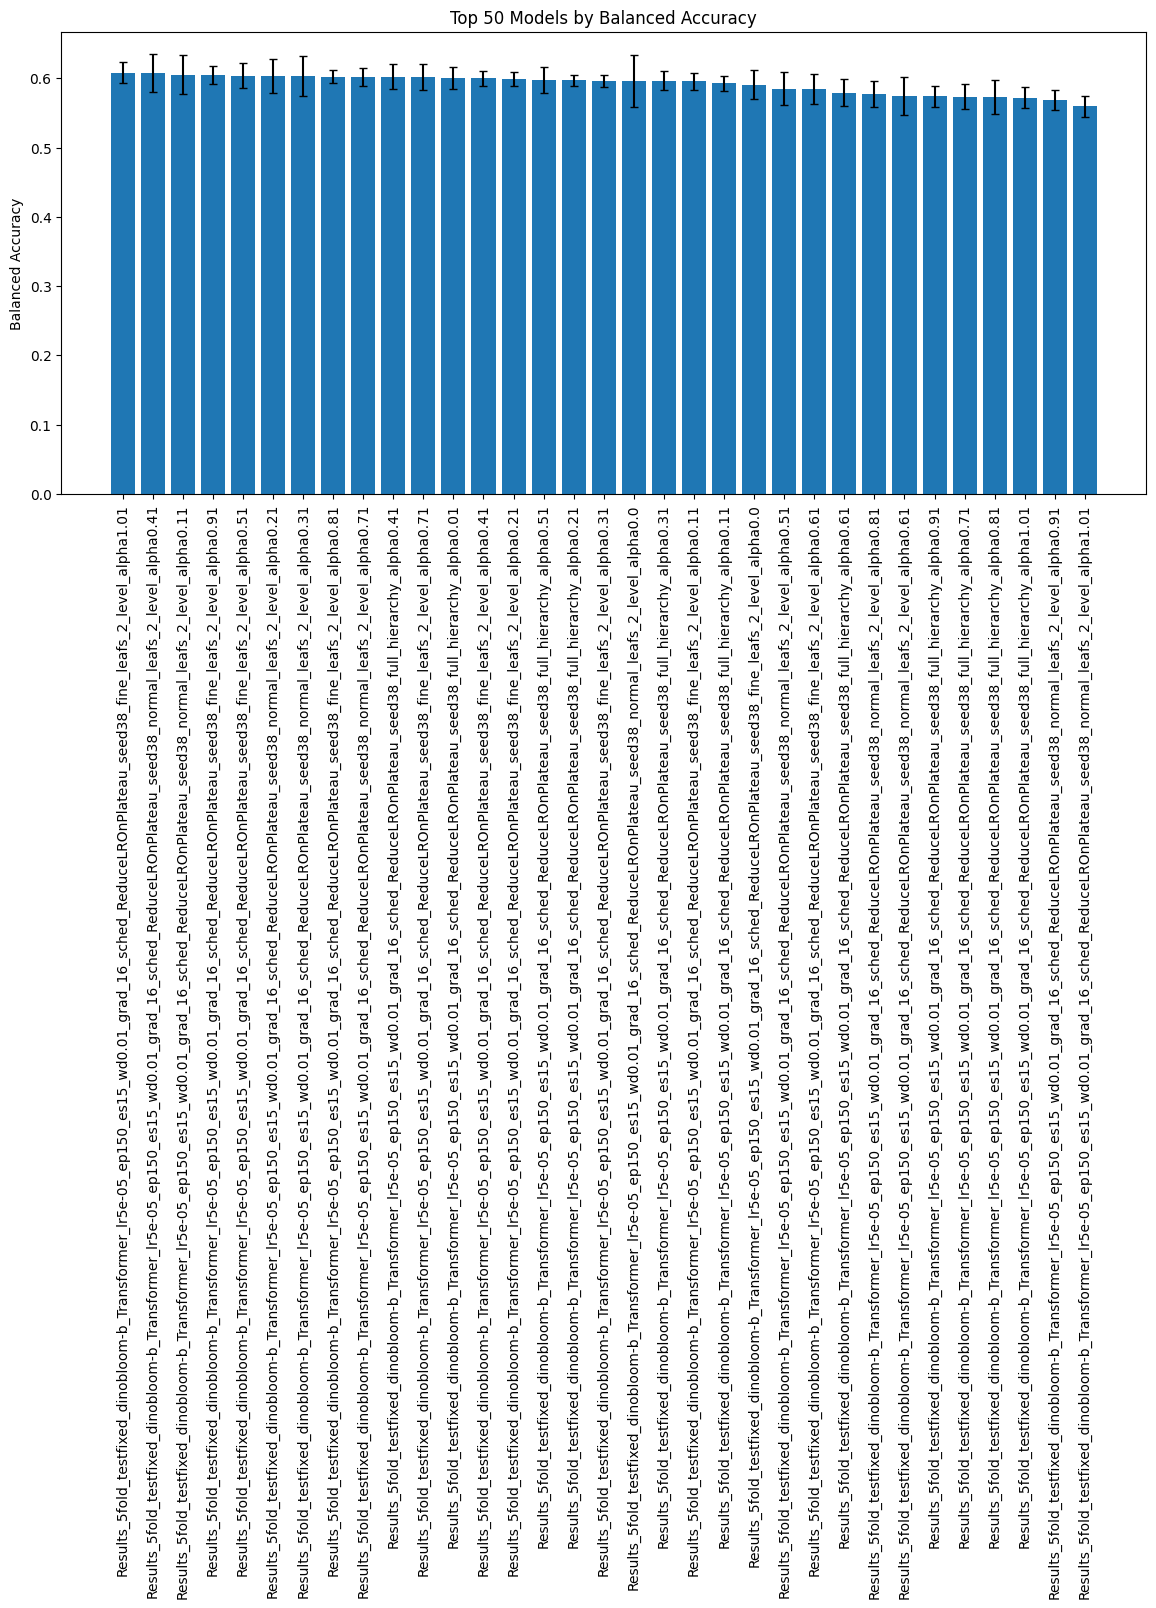

/tmp/ipykernel_4026785/3677149585.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


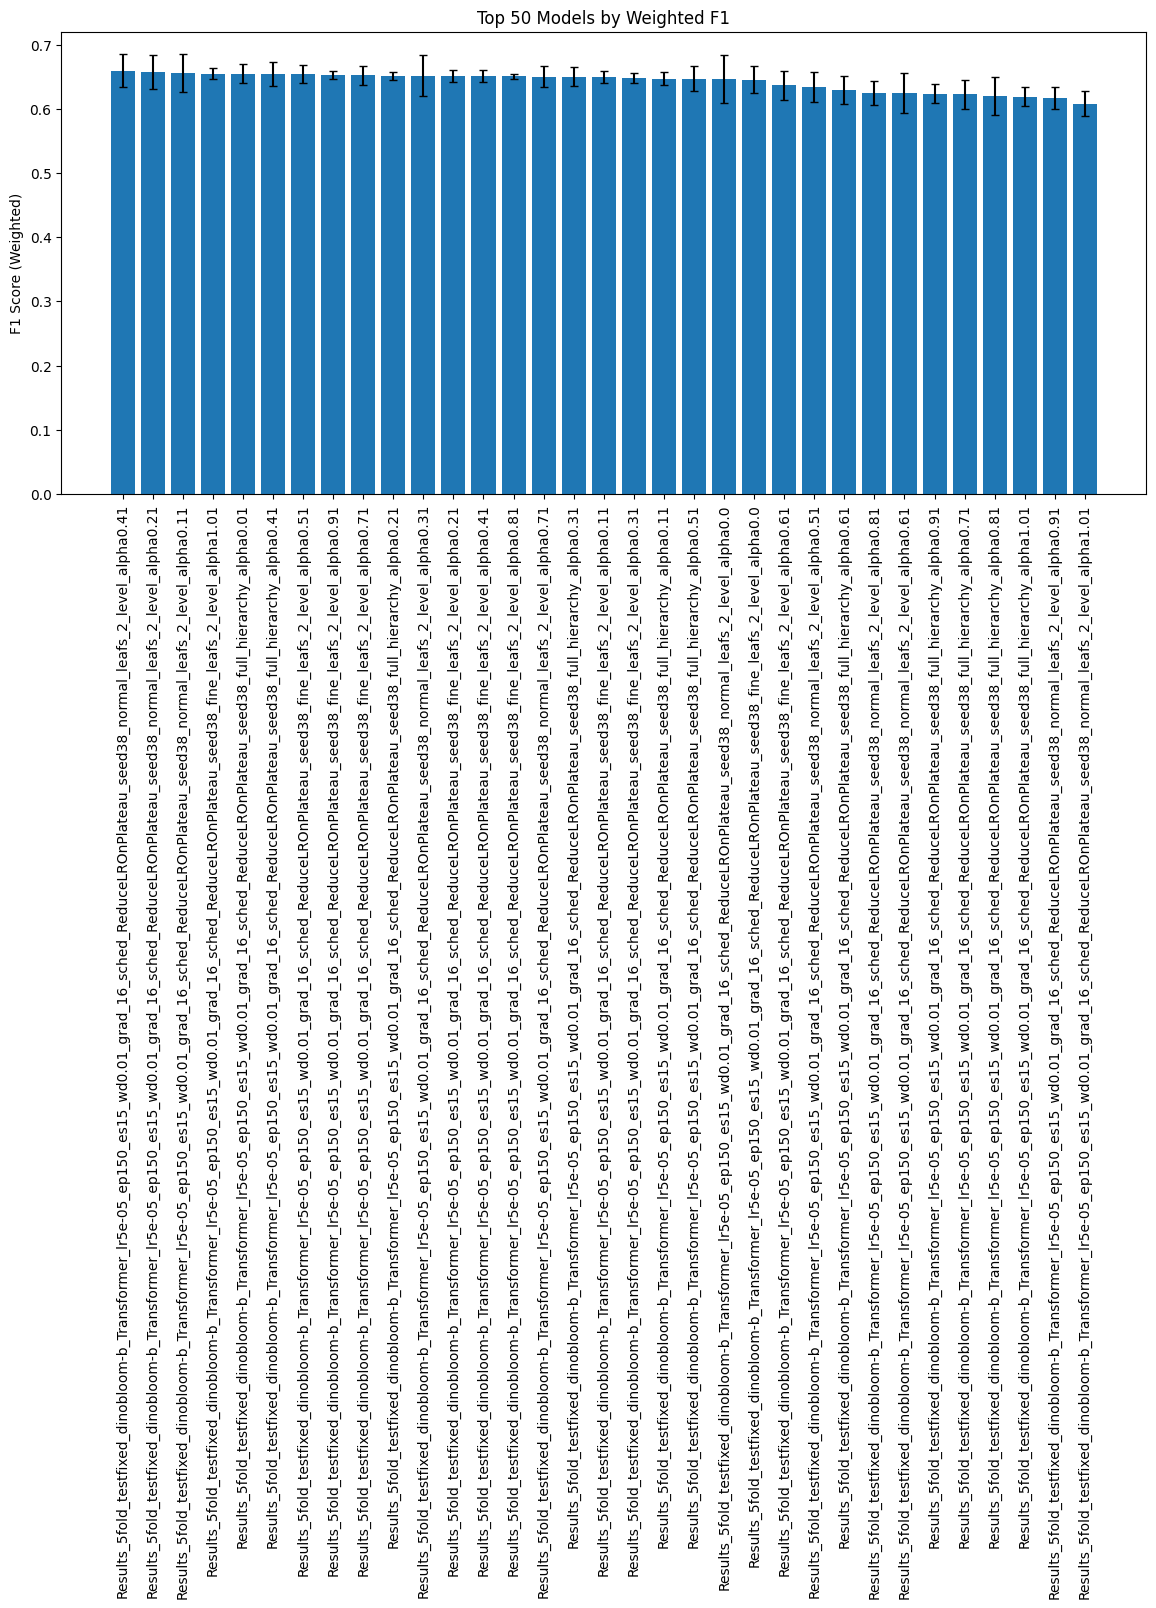

In [1]:
import os
import glob
from unittest import result
import pandas as pd
import matplotlib.pyplot as plt

# Path to results directory
base_dir = "/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results"

# Collect results
results = {}

for csv_file in glob.glob(os.path.join(base_dir, "**/summary/overall_metrics_full.csv"), recursive=True):
    try:
        df = pd.read_csv(csv_file)
        # Extract metrics
        metrics = {row["Metric"]: (float(row["Mean"]), float(row["Std"])) for _, row in df.iterrows()}
        # Use folder name as model identifier
        model_name = os.path.basename(os.path.dirname(os.path.dirname(csv_file)))
        results[model_name] = {
            "balanced_accuracy": metrics.get("Balanced Accuracy", (None, None)),
            "f1_score": metrics.get("Weighted F1", (None, None)),
        }
    except Exception as e:
        print(f"Skipping {csv_file}, error: {e}")

# Convert to dataframe
results_df = pd.DataFrame.from_dict(results, orient="index")

# ---- Balanced Accuracy ----
top_bacc = results_df.sort_values(
    "balanced_accuracy", ascending=False, key=lambda x: x.apply(lambda y: y[0] if y else -1)
).head(50)

means_bacc = top_bacc["balanced_accuracy"].apply(lambda x: x[0])
stds_bacc = top_bacc["balanced_accuracy"].apply(lambda x: x[1])
print(means_bacc)

plt.figure(figsize=(14, 6))
plt.bar(top_bacc.index, means_bacc, yerr=stds_bacc, capsize=3)
plt.xticks(rotation=90)
plt.ylabel("Balanced Accuracy")
plt.title("Top 50 Models by Balanced Accuracy")
plt.tight_layout()
plt.show()

# ---- Weighted F1 ----
top_f1 = results_df.sort_values(
    "f1_score", ascending=False, key=lambda x: x.apply(lambda y: y[0] if y else -1)
).head(50)

means_f1 = top_f1["f1_score"].apply(lambda x: x[0])
stds_f1 = top_f1["f1_score"].apply(lambda x: x[1])
results_df.to_csv('/lustre/groups/labs/marr/qscd01/workspace/fatih.oezluegedik/cAItomorph_Fatih/final_results/summary/overall_metrics_full.csv', index=False)
plt.figure(figsize=(14, 6))
plt.bar(top_f1.index, means_f1, yerr=stds_f1, capsize=3)
plt.xticks(rotation=90)
plt.ylabel("F1 Score (Weighted)")
plt.title("Top 50 Models by Weighted F1")
plt.tight_layout()
plt.show()
